In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score


ModuleNotFoundError: No module named 'sklearn'

In [3]:
python --version

NameError: name 'python' is not defined

In [1]:
!pip install azure.storage.blob

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
import io

def read_csv_from_blob(connection_string, container_name, blob_name):
    try:
        # Create the BlobServiceClient object
        blob_service_client = BlobServiceClient.from_connection_string(connection_string)
        
        # Get the container client
        container_client = blob_service_client.get_container_client(container_name)
        
        # Get the blob client
        blob_client = container_client.get_blob_client(blob_name)
        
        # Download the blob content
        download_stream = blob_client.download_blob()
        
        # Convert to pandas dataframe
        data = pd.read_csv(io.StringIO(download_stream.content_as_text()))
        
        return data
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Replace these with your actual Azure Storage details
connection_string = "DefaultEndpointsProtocol=https;AccountName=fethikhlifi;AccountKey=ct5voqwOD9BSo3JZdNNMLVRRTX0M6u0xyPtL8lUEmZweJgu4DCW8+jUDPbY2bn/lkqRj2udm45KJ+AStObJDCg==;EndpointSuffix=core.windows.net"
container_name = "data"
blob_name = "immo_France_V3.csv"

# Read the data
data = read_csv_from_blob(connection_string, container_name, blob_name)
if data is not None:
    print("Data loaded successfully")
    print("Shape of the dataset:", data.shape)
    print("\nFirst few rows:")
    print(data.head())

Data loaded successfully
Shape of the dataset: (1621763, 9)

First few rows:
   type_local  valeur_fonciere  nombre_pieces_principales  \
0        True         253000.0                          4   
1        True          50000.0                          3   
2        True          80000.0                          3   
3        True         130000.0                          4   
4        True         280000.0                          4   

   Surface_de_Calcul_prix  surface_terrain  longitude  latitude  DateY  DateM  
0                    93.0              800   1.302674  43.46538   2021      3  
1                    80.0               53   3.037886  43.36901   2020      9  
2                    63.0                0   6.753338  44.41440   2020      5  
3                    99.0              630  -0.543289  45.06149   2023      9  
4                    57.0              508   1.939939  48.83134   2022      7  


In [3]:
# Lire le fichier CSV
data = pd.read_csv('immo_France_V3.csv')
print("Shape of the dataset:", data.shape)
print("\nFirst few rows:")
print(data.head())

Shape of the dataset: (1621763, 9)

First few rows:
   type_local  valeur_fonciere  nombre_pieces_principales  \
0        True         253000.0                          4   
1        True          50000.0                          3   
2        True          80000.0                          3   
3        True         130000.0                          4   
4        True         280000.0                          4   

   Surface_de_Calcul_prix  surface_terrain  longitude  latitude  DateY  DateM  
0                    93.0              800   1.302674  43.46538   2021      3  
1                    80.0               53   3.037886  43.36901   2020      9  
2                    63.0                0   6.753338  44.41440   2020      5  
3                    99.0              630  -0.543289  45.06149   2023      9  
4                    57.0              508   1.939939  48.83134   2022      7  


In [3]:

# Charger les données
# Charger les données à partir du fichier CSV
data = pd.read_csv('immo_France_V3.csv')

# Calculer le prix par mètre carré
data['prix_m2'] = data['valeur_fonciere'] / data['Surface_de_Calcul_prix']

# Filtrer les données pour exclure les lignes où 'prix_m2' est supérieur ou égal à 30000
data = data[data['prix_m2'] < 30000]


In [ ]:
pip install azure.storage.blob

In [4]:
# Vérifier les données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1621547 entries, 0 to 1621762
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   type_local                 1621547 non-null  bool   
 1   valeur_fonciere            1621547 non-null  float64
 2   nombre_pieces_principales  1621547 non-null  int64  
 3   Surface_de_Calcul_prix     1621547 non-null  float64
 4   surface_terrain            1621547 non-null  int64  
 5   longitude                  1621547 non-null  float64
 6   latitude                   1621547 non-null  float64
 7   DateY                      1621547 non-null  int64  
 8   DateM                      1621547 non-null  int64  
 9   prix_m2                    1621547 non-null  float64
dtypes: bool(1), float64(5), int64(4)
memory usage: 125.3 MB
None


In [5]:
# Définir la variable cible
y = data['valeur_fonciere']

# Sélection des variables explicatives (exclusion de 'valeur_fonciere', 'DateY', 'DateM', et 'type_local')
X = data.drop(columns=['valeur_fonciere','prix_m2'], errors='ignore')

In [6]:



# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialiser les modèles de régression
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Entraîner les modèles et évaluer leurs performances
results = {}
for name, model in models.items():
    print(f"📊 Entraînement du modèle : {name}")
    print("--------------------------------------------------------------")
    
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Évaluation des performances
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #accuracy = accuracy_score(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
   
    
    # Stocker les résultats
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}
    
   # Afficher les résultats
print("\n📊 Résultats des modèles :")
for model, scores in results.items():
    print(f"📌 {model} → MAE: {scores['MAE']:.2f}, R²: {scores['R² Score']:.4f}")


📊 Entraînement du modèle : RandomForest
--------------------------------------------------------------
📊 Entraînement du modèle : XGBoost
--------------------------------------------------------------

📊 Résultats des modèles :
📌 RandomForest → MAE: 54170.48, R²: 0.7712
📌 XGBoost → MAE: 56544.66, R²: 0.7511


In [9]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os
from datetime import datetime

# Configuration
UTILISATEUR = "FETHl"
DATE = "2025-02-07 22:31:20"
CHEMIN_RESULTATS = "resultats_analyse_diabete"
CHEMIN_DONNEES = "/workspaces/datascientist/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

# Configuration du style général
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12

def creer_visualisations_avancees():
    try:
        # Chargement des données
        df = pd.read_csv(CHEMIN_DONNEES)
        
        # Création du dossier de résultats
        os.makedirs(CHEMIN_RESULTATS, exist_ok=True)
        
        # Calcul des corrélations
        correlations = abs(df.corr()['Diabetes_binary']).sort_values(ascending=False)
        top_6_features = correlations[1:7].index

        # 1. Graphique en violon avec points de données
        plt.figure(figsize=(15, 10))
        for idx, feature in enumerate(top_6_features):
            plt.subplot(2, 3, idx+1)
            sns.violinplot(x='Diabetes_binary', y=feature, data=df, 
                         inner='quartile', palette=['lightblue', 'lightcoral'])
            plt.title(f'{feature}', fontsize=12)
            plt.xlabel('Diabétique (0: Non, 1: Oui)')
        plt.suptitle('Distribution des Variables par Statut Diabétique\n(Graphiques en Violon)', 
                    fontsize=14, y=1.02)
        plt.tight_layout()
        plt.savefig(f'{CHEMIN_RESULTATS}/violin_plots.png', dpi=300, bbox_inches='tight')
        plt.close()

        # 2. KDE plots (Density plots)
        plt.figure(figsize=(15, 10))
        for idx, feature in enumerate(top_6_features):
            plt.subplot(2, 3, idx+1)
            sns.kdeplot(data=df[df['Diabetes_binary']==0][feature], 
                       label='Non Diabétique', color='blue', alpha=0.5)
            sns.kdeplot(data=df[df['Diabetes_binary']==1][feature], 
                       label='Diabétique', color='red', alpha=0.5)
            plt.title(f'Distribution de {feature}')
            plt.legend()
        plt.suptitle('Densité de Distribution des Variables\npar Statut Diabétique', 
                    fontsize=14, y=1.02)
        plt.tight_layout()
        plt.savefig(f'{CHEMIN_RESULTATS}/density_plots.png', dpi=300, bbox_inches='tight')
        plt.close()

        # 3. Graphique en barres empilées
        plt.figure(figsize=(15, 10))
        for idx, feature in enumerate(top_6_features):
            plt.subplot(2, 3, idx+1)
            df_grouped = df.groupby(feature)['Diabetes_binary'].value_counts(normalize=True).unstack()
            df_grouped.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
            plt.title(f'Proportion de Diabétiques par {feature}')
            plt.xlabel(feature)
            plt.ylabel('Proportion')
            plt.legend(['Non Diabétique', 'Diabétique'])
            plt.xticks(rotation=45)
        plt.suptitle('Proportion de Diabétiques par Niveau de Variable', 
                    fontsize=14, y=1.02)
        plt.tight_layout()
        plt.savefig(f'{CHEMIN_RESULTATS}/stacked_bars.png', dpi=300, bbox_inches='tight')
        plt.close()

        # 4. Heatmap des corrélations avec annotations
        plt.figure(figsize=(12, 10))
        correlation_matrix = df[list(top_6_features) + ['Diabetes_binary']].corr()
        mask = np.triu(np.ones_like(correlation_matrix), k=1)
        sns.heatmap(correlation_matrix, 
                   mask=mask,
                   annot=True, 
                   fmt='.2f',
                   cmap='RdYlBu_r',
                   square=True,
                   linewidths=0.5)
        plt.title('Matrice de Corrélation\nVariables les Plus Corrélées avec le Diabète', 
                 pad=20)
        plt.tight_layout()
        plt.savefig(f'{CHEMIN_RESULTATS}/correlation_heatmap.png', dpi=300, bbox_inches='tight')
        plt.close()

        # 5. Pairplot pour les interactions entre variables
        sns.pairplot(df[list(top_6_features) + ['Diabetes_binary']], 
                    hue='Diabetes_binary',
                    palette=['lightblue', 'lightcoral'],
                    diag_kind='kde')
        plt.suptitle('Interactions entre les Variables les Plus Corrélées', 
                    y=1.02, fontsize=14)
        plt.savefig(f'{CHEMIN_RESULTATS}/pairplot.png', dpi=300, bbox_inches='tight')
        plt.close()

        # 6. Radar plot (Spider plot)
        # Normalisation des données pour le radar plot
        df_normalized = df[list(top_6_features)].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
        
        # Moyennes pour diabétiques et non diabétiques
        means_diabetic = df_normalized[df['Diabetes_binary'] == 1].mean()
        means_non_diabetic = df_normalized[df['Diabetes_binary'] == 0].mean()
        
        # Création du radar plot
        angles = np.linspace(0, 2*np.pi, len(top_6_features), endpoint=False)
        
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
        ax.plot(angles, means_diabetic, 'o-', linewidth=2, label='Diabétique', color='red', alpha=0.7)
        ax.plot(angles, means_non_diabetic, 'o-', linewidth=2, label='Non Diabétique', color='blue', alpha=0.7)
        ax.fill(angles, means_diabetic, alpha=0.25, color='red')
        ax.fill(angles, means_non_diabetic, alpha=0.25, color='blue')
        ax.set_xticks(angles)
        ax.set_xticklabels(top_6_features)
        plt.title('Comparaison des Profils Moyens\nDiabétiques vs Non Diabétiques', pad=20)
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.tight_layout()
        plt.savefig(f'{CHEMIN_RESULTATS}/radar_plot.png', dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Visualisations créées avec succès dans le dossier {CHEMIN_RESULTATS}")
        print("\nLes 6 caractéristiques les plus corrélées avec le diabète sont :")
        for feature in top_6_features:
            correlation = df[feature].corr(df['Diabetes_binary'])
            print(f"{feature}: {correlation:.3f}")

    except Exception as e:
        print(f"Erreur lors de la création des visualisations : {str(e)}")
        raise

if __name__ == "__main__":
    creer_visualisations_avancees()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [8]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy: 0.7509
ROC AUC Score: 0.8277
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



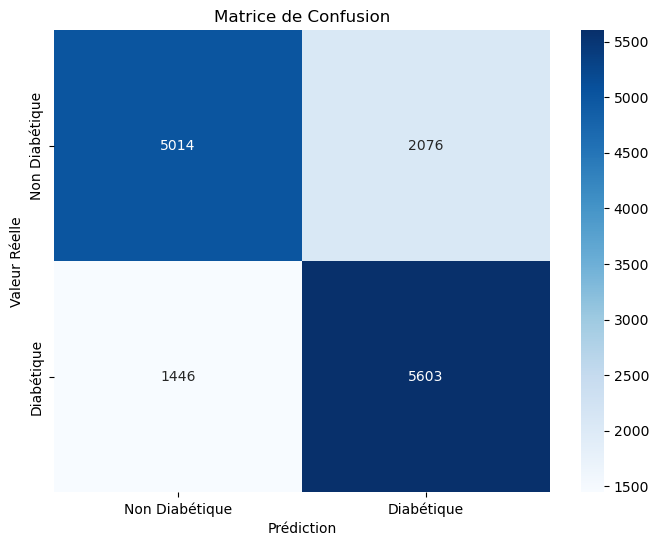

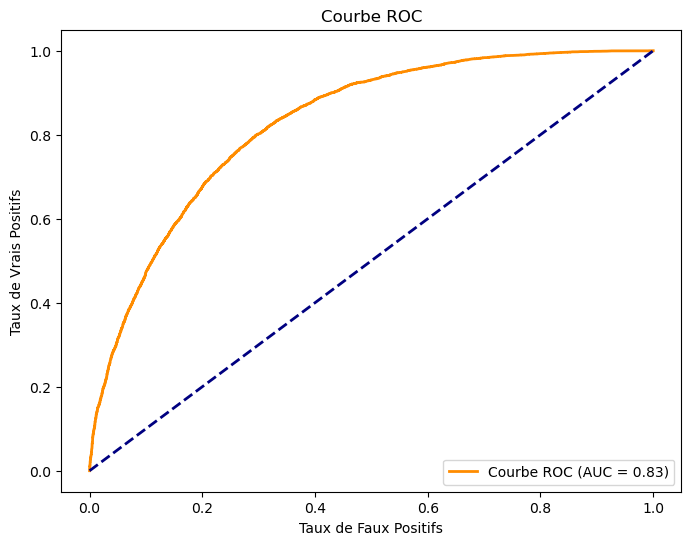

In [24]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configuration
data_path = "C:/Users/Utilisateur/Desktop/datascience/machine learning/Diabet/Projet/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
CHEMIN_RESULTATS = "resultats_analyse_diabete"

# Création du dossier des résultats si nécessaire
os.makedirs(CHEMIN_RESULTATS, exist_ok=True)

# Chargement des données avec vérification d'existence
def load_data(filepath):
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    else:
        raise FileNotFoundError(f"Le fichier {filepath} est introuvable.")

data = load_data(data_path)

# Vérification des valeurs manquantes
if data.isnull().sum().sum() > 0:
    print("Des valeurs manquantes ont été détectées. Pensez à les traiter.")

# Définition des caractéristiques et de la cible
y = data['Diabetes_binary']
X = data.drop('Diabetes_binary', axis=1)

# Sélection des caractéristiques les plus pertinentes
correlations = abs(X.corrwith(y)).sort_values(ascending=False)
top_features = correlations[correlations > 0.2].index.tolist()
X = X[top_features]

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définition du modèle avec optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.title('Matrice de Confusion')
plt.ylabel('Valeur Réelle')
plt.xlabel('Prédiction')
plt.savefig(f'{CHEMIN_RESULTATS}/Matrice_de_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig(f'{CHEMIN_RESULTATS}/Courbe_ROC.png', dpi=300, bbox_inches='tight')
plt.show()




In [23]:
# Exemple de prédiction
donnees_exemple = pd.DataFrame({
        'GenHlth': [4, 3],
         'HighBP': [1, 1],
         'BMI': [43, 22],
         'HighChol': [1, 1],
         'Age': [7, 10],
         'DiffWalk': [0, 0],
         'Income': [2, 1],
         'PhysHlth': [0, 0],
         'HeartDiseaseorAttack': [0,0]
})

 # Normalisation des nouvelles données
donnees_exemple = scaler.transform(donnees_exemple)

# Prédictions
predictions = best_model.predict(donnees_exemple)
probabilites = best_model.predict_proba(donnees_exemple)

# Affichage des résultats
for i, (pred, prob) in enumerate(zip(predictions, probabilites)):
    print(f"\nPersonne {i+1}:")
    print(f"Prédiction : {'Diabétique' if pred == 1 else 'Non-diabétique'}")
    print(f"Probabilité de diabète : {prob[1]:.2%}")


Personne 1:
Prédiction : Diabétique
Probabilité de diabète : 90.54%

Personne 2:
Prédiction : Diabétique
Probabilité de diabète : 60.56%


In [22]:
data.tail(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70592,1.0,1.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,0.0,7.0,5.0,2.0
70593,1.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,7.0,5.0,1.0
70594,1.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,3.0,0.0,1.0,8.0,6.0,6.0
70595,1.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,8.0,4.0,1.0
70596,1.0,1.0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1.0,10.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
